<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [5]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/noarch         [<=>                 ] (00m:00s) 
pkgs/main/noarch       

In [6]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [7]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [8]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [9]:
tesla_info=tesla.info
tesla_info
#tesla_info['country']
#tesla_share_price_data = tesla.history(period="max")
#tesla_share_price_data.reset_index(inplace=True)

{'zip': '78725',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 99290,
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limited warrantie

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [11]:
#tesla_info['country']
tesla_share_price_data = tesla.history(period="max")
tesla_share_price_data.head()
#tesla_share_price_data.reset_index(inplace=True)
#tesla_share_price_data.plot(x="Date", y="Open")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


<AxesSubplot:xlabel='Date'>

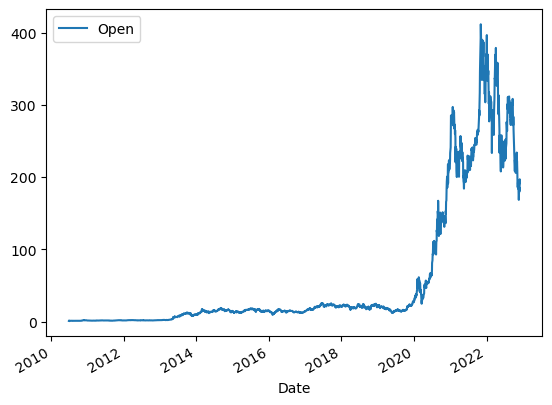

In [12]:
tesla_share_price_data.reset_index(inplace=True)
tesla_share_price_data.plot(x="Date", y="Open")

## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. Save the text of the response as a variable named `html_data`.


In [13]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data  = requests.get(url).text 


Parse the html data using `beautiful_soup`.


In [14]:
soup = BeautifulSoup(html_data, "html.parser")
for link in soup.find_all('a',href=True):  # in html anchor/link is represented by the tag <a>

    print(link.get('href'))


https://www.macrotrends.net
/stocks/stock-screener
/stocks/research
/charts/stock-indexes
/charts/precious-metals
/charts/energy
/charts/commodities
/charts/exchange-rates
/charts/interest-rates
/charts/economy
/countries/topic-overview
https://www.macrotrends.net/stocks/charts/TSLA/tesla/stock-price-history
https://www.macrotrends.net/stocks/charts/TSLA/tesla/financial-statements
https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue
https://www.macrotrends.net/stocks/charts/TSLA/tesla/total-assets
https://www.macrotrends.net/stocks/charts/TSLA/tesla/profit-margins
https://www.macrotrends.net/stocks/charts/TSLA/tesla/pe-ratio
https://www.macrotrends.net/stocks/charts/TSLA/tesla/current-ratio
https://www.macrotrends.net/stocks/charts/TSLA/tesla/dividend-yield-history
https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue
https://www.macrotrends.net/stocks/charts/TSLA/tesla/gross-profit
https://www.macrotrends.net/stocks/charts/TSLA/tesla/operating-income
https://www.macrotr

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [15]:
tables = soup.find_all('table')
len(tables)
#tables

6

In [16]:
for index,table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
print(table_index)


1


In [48]:
print(tables[table_index].prettify())

<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    Tesla Quarterly Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2022-09-30
   </td>
   <td style="text-align:center">
    $21,454
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2022-06-30
   </td>
   <td style="text-align:center">
    $16,934
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2022-03-31
   </td>
   <td style="text-align:center">
    $18,756
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-12-31
   </td>
   <td style="text-align:center">
    $17,719
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-09-30
   </td>
   <td style="text-align:center">
    $13,757
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-06-30
   </td>
   <td style="text-align:center">
    $11,95

In [52]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text
        #population = col[2].text.strip()
        #area = col[3].text.strip()
        #density = col[4].text.strip()
        tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

tesla_revenue.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [18]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Execute the following lines to remove an null or empty strings in the Revenue column.


In [19]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [20]:
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [21]:
gme = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [22]:
gme_info = gme.info
gme_info

{'zip': '76051',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 12000,
 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its e-commerce properties and various stores in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, virtual reality products, and memory cards; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It also sells collectibles comprising licensed merchandise primarily related to the gaming, television, and movie industries, as well as pop culture themes. As of January 29, 2022, the company operated 4,573 stores and ecommerce sites under the GameStop, EB Games, and Micromania brands; and 50 pop culture themed stores that sell collectibles, apparel, gadgets, electronics, toys, and other retail products under the Zing Pop Culture brand, 

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [23]:
gme_share_price_data = gme.history(period="max")
gme_share_price_data = gme.
gme_share_price_data.head()

AttributeError: 'Ticker' object has no attribute 'revenue'

In [36]:
gme_share_price_data.reset_index(inplace=True)
gme_share_price_data.plot(x="Date", y='revenue')

ValueError: cannot insert level_0, already exists

## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [25]:
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data1  = requests.get(url1).text 

Parse the html data using `beautiful_soup`.


In [26]:
soup = BeautifulSoup(html_data1, "html.parser")
for link1 in soup.find_all('a',href=True):  # in html anchor/link is represented by the tag <a>

    print(link1.get('href'))


https://web.archive.org/web/20200814131437/https://www.macrotrends.net/
https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/stock-screener
https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/research
https://web.archive.org/web/20200814131437/https://www.macrotrends.net/charts/stock-indexes
https://web.archive.org/web/20200814131437/https://www.macrotrends.net/charts/precious-metals
https://web.archive.org/web/20200814131437/https://www.macrotrends.net/charts/energy
https://web.archive.org/web/20200814131437/https://www.macrotrends.net/charts/commodities
https://web.archive.org/web/20200814131437/https://www.macrotrends.net/charts/exchange-rates
https://web.archive.org/web/20200814131437/https://www.macrotrends.net/charts/interest-rates
https://web.archive.org/web/20200814131437/https://www.macrotrends.net/futures
https://web.archive.org/web/20200814131437/https://www.macrotrends.net/charts/economy
https://web.archive.org/web/20200814

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [27]:
tables1 = soup.find_all('table')
len(tables1)

6

In [28]:
for index,table in enumerate(tables):
    if ("GameStop Quarterly Revenue" in str(table)):
        table_index = index
print(table_index)

1


In [69]:
print(tables[table_index].prettify())

<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    GameStop Quarterly Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2020-04-30
   </td>
   <td style="text-align:center">
    $1,021
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2020-01-31
   </td>
   <td style="text-align:center">
    $2,194
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2019-10-31
   </td>
   <td style="text-align:center">
    $1,439
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2019-07-31
   </td>
   <td style="text-align:center">
    $1,286
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2019-04-30
   </td>
   <td style="text-align:center">
    $1,548
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2019-01-31
   </td>
   <td style="text-align:center">
    $3,063
 

In [29]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text
        #population = col[2].text.strip()
        #area = col[3].text.strip()
        #density = col[4].text.strip()
        gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

gme_revenue

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"
5,2021-06-30,"$11,958"
6,2021-03-31,"$10,389"
7,2020-12-31,"$10,744"
8,2020-09-30,"$8,771"
9,2020-06-30,"$6,036"


In [30]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [31]:
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [32]:
gme_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


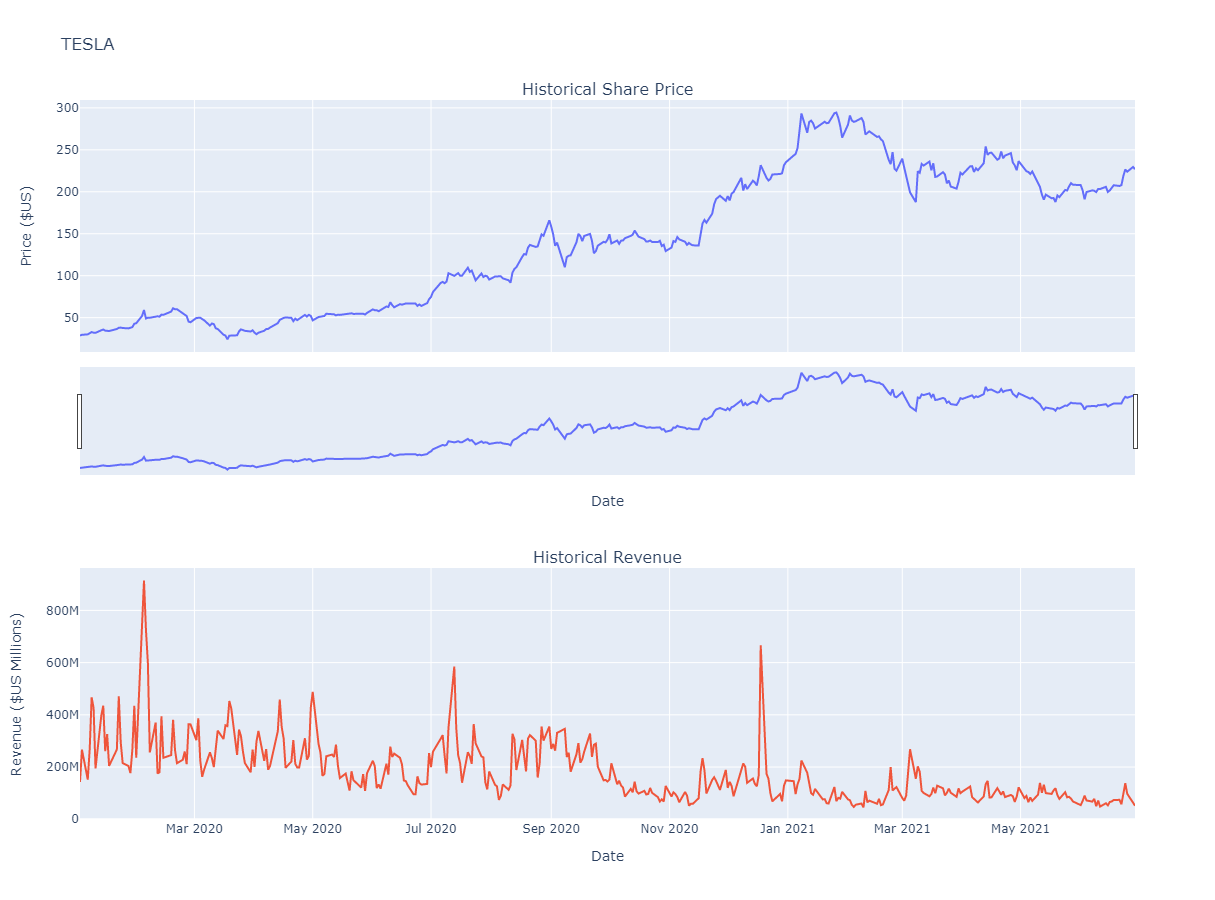

In [48]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
import pandas as pd

stock_data = yf.download("TSLA", start="2020-01-01", end="2021-06-30", progress=False)
revenue_data = yf.download("TSLA", start="2020-01-01", end="2021-06-30", progress=False)
stock_data.reset_index(inplace=True)
revenue_data.reset_index(inplace=True)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, 
                        shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=.3)
    
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-30']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-06-30']
    
    fig.add_trace(go.Scatter(
        x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True),
        y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), 
                             y=revenue_data_specific.Volume.astype("float"),
                             name="Volume"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    fig.show()
    
make_graph(stock_data, revenue_data, 'TESLA')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


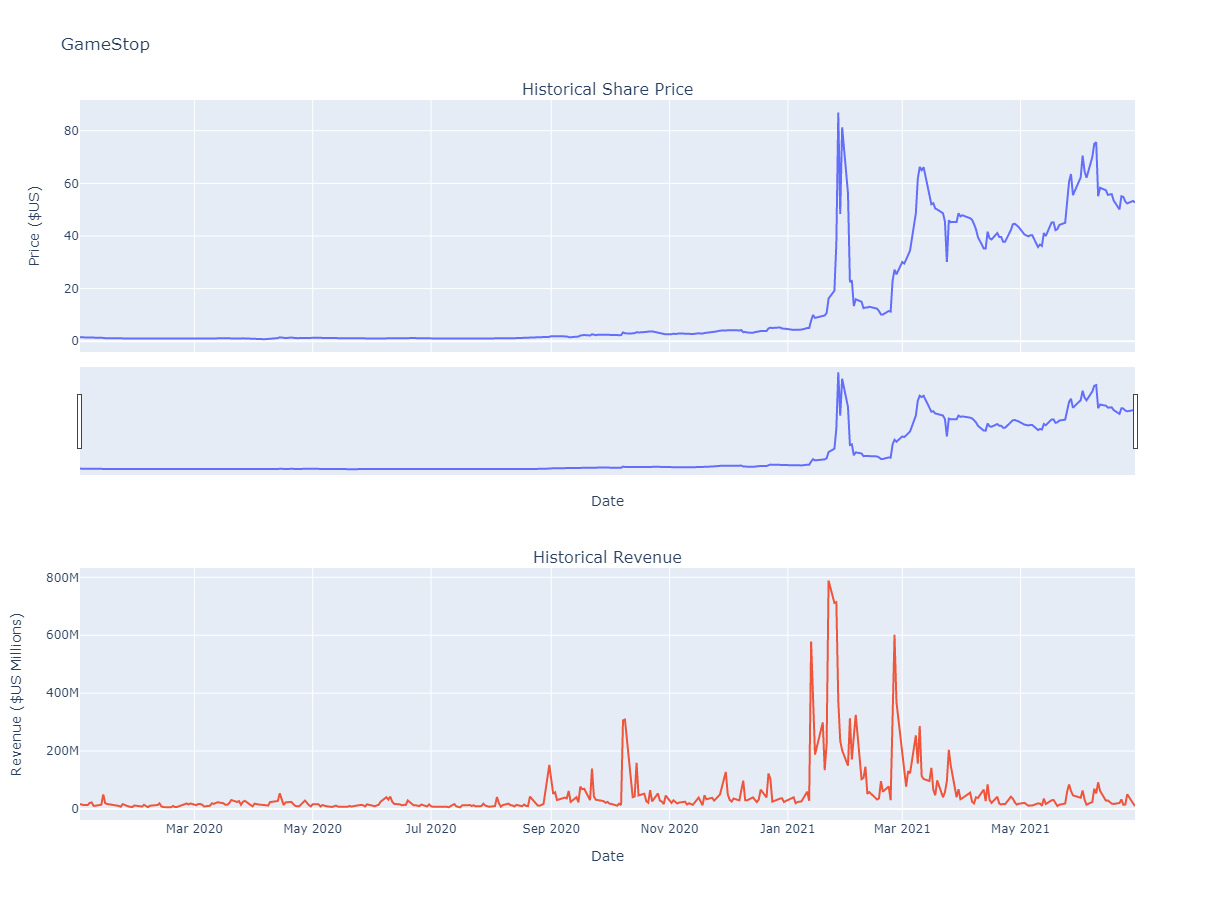

In [49]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
import pandas as pd

stock_data = yf.download("GME", start="2020-01-01", end="2021-06-30", progress=False)
revenue_data = yf.download("GME", start="2020-01-01", end="2021-06-30", progress=False)
stock_data.reset_index(inplace=True)
revenue_data.reset_index(inplace=True)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, 
                        shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=.3)
    
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-30']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-06-30']
    
    fig.add_trace(go.Scatter(
        x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True),
        y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), 
                             y=revenue_data_specific.Volume.astype("float"),
                             name="Volume"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    fig.show()
    
make_graph(stock_data, revenue_data, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
